In [1]:
import pickle #for saving and loading the dataset

import numpy as np
import networkx as nx
import torch
from torch_geometric.data import Data
import time


# In[2]:


import random
from torch_geometric.utils import from_networkx

import matplotlib.pyplot as plt

# In[13]:


# For plotting

# To avoid copying things to GPU memory,
# ideally allocate everything in torch on the GPU
# and avoid non-torch function calls
"""
torch.set_printoptions(precision=10) # Set displayed output precision to 10 digits

from torchquad import enable_cuda # Necessary to enable GPU support
from torchquad import Trapezoid, Simpson, Boole, MonteCarlo, VEGAS # The available integrators
import torchquad


"""

# In[3]:


from torch_geometric.nn import SAGEConv

###Own Moduls
import sys
sys.path.insert(1,'../src')
from DataLoader import RGGDataset
from CGraphSage import forward


09:12:17|TQ-INFO| Initializing torchquad.
09:12:17|TQ-INFO| __pyTorch VERSION:<module 'torch.version' from '/home/math/maskey/anaconda3/envs/pyg_cuda102/lib/python3.8/site-packages/torch/version.py'>
09:12:17|TQ-INFO| __CUDNN VERSION:7605
09:12:17|TQ-INFO| __Number of CUDA Devices:1
09:12:17|TQ-INFO| Active CUDA Device: GPU0
09:12:17|TQ-INFO| Setting default tensor type to cuda.Float32 (CUDA is initialized).


In [2]:
DL = RGGDataset(root = "//home/groups/ai/maskey/input", size = 1002)


In [3]:
def main():
    DL = RGGDataset(root = "//home/groups/ai/maskey/input", size = 1002)
    model = torch.load("../models/graphSageOneLayer.pt")
    the_weight = (model.lin_l).weight
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    L2Errors = []
    for i in range(1, 1002, 100):
        pos = DL.get(i).pos
        cOutput = forward(positions = pos, weight = the_weight)
        data = DL.get(i)
        data = data.to(device)
        nodeErrors = cOutput - model.forward(data.x, data.edge_index)
        L2Error = torch.sqrt(1/len(nodeErrors)*torch.sum(torch.pow(nodeErrors,2)))
        L2Errors.append(L2Error)
    return L2Errors

In [4]:
errors = main()

/home/math/maskey/anaconda3/envs/pyg_cuda102/lib/python3.8/site-packages/torchquad/integration/simpson.py:101: UserWarning: N per dimension cannot be even due to necessary subdivisions. N per dim will now be changed to the next lower integer, i.e. 1000 -> 999.
  warnings.warn(
09:12:30|TQ-INFO| Integration grid created.
09:12:30|TQ-INFO| Computed integral was tensor(0.0047837608).
09:12:30|TQ-INFO| Integration grid created.
09:12:30|TQ-INFO| Computed integral was tensor(0.0944750831).
/home/math/maskey/Dokumente/Project_Transferability_MPNN/python_scripts/notebooks/../src/CGraphSage.py:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  values.append([torch.tensor(the_weight*(int_of_f/measure_Ball))])


0


09:12:31|TQ-INFO| Integration grid created.
09:12:31|TQ-INFO| Computed integral was tensor(0.0139202159).
09:12:31|TQ-INFO| Integration grid created.
09:12:31|TQ-INFO| Computed integral was tensor(0.1178835109).
09:12:31|TQ-INFO| Integration grid created.
09:12:31|TQ-INFO| Computed integral was tensor(0.0182205141).
09:12:31|TQ-INFO| Integration grid created.
09:12:31|TQ-INFO| Computed integral was tensor(0.1191403121).
09:12:31|TQ-INFO| Integration grid created.
09:12:31|TQ-INFO| Computed integral was tensor(0.0186928399).
09:12:31|TQ-INFO| Integration grid created.
09:12:31|TQ-INFO| Computed integral was tensor(0.1243689805).
09:12:31|TQ-INFO| Integration grid created.
09:12:31|TQ-INFO| Computed integral was tensor(0.0318407156).
09:12:31|TQ-INFO| Integration grid created.
09:12:31|TQ-INFO| Computed integral was tensor(0.1256661713).
09:12:31|TQ-INFO| Integration grid created.
09:12:31|TQ-INFO| Computed integral was tensor(0.0216961317).
09:12:31|TQ-INFO| Integration grid created.
09

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.0638609231).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.1256518960).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.0081989467).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.1240405589).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.0198877119).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.1256710738).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.0412802920).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.1254140437).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.0040770834).
09:12:32|TQ-INFO| Integration grid created.
09

18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.1214546710).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.0170241427).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.1256478727).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.0458459742).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.1256630421).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.0352807678).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.1256599128).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.0495392941).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.0852200985).
09:12:32|TQ-INFO| Integration grid created.
09

36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53


09:12:32|TQ-INFO| Computed integral was tensor(0.1020096391).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.0379300490).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.1256777644).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.0039073080).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.0410039648).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.0738661289).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.1215751469).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.0132393017).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.1256648302).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor

54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71


09:12:32|TQ-INFO| Computed integral was tensor(0.0551313050).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.0681750476).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.1032340825).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.0594073310).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.1256492138).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.0086542238).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.0592555627).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.0567783378).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.1190615594).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor

72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89


09:12:32|TQ-INFO| Computed integral was tensor(0.1256545782).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.0389869437).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.0845079124).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.0278843846).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.0780577064).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.0253188834).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.1256518960).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.0006642427).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor(0.0546484888).
09:12:32|TQ-INFO| Integration grid created.
09:12:32|TQ-INFO| Computed integral was tensor

90
91
92
93
94
95
96
97
98
99
100
0
1
2
3
4
5
6


09:12:33|TQ-INFO| Computed integral was tensor(0.0128971413).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.1110682786).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.0595825613).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.1238199025).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.0088271331).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.0921725482).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.0184445530).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.1102396324).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.0590028390).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor

7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


09:12:33|TQ-INFO| Computed integral was tensor(0.1081976965).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.0246399827).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.1256492138).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.0184451900).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.1256804466).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.0184081607).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.1256684065).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.0556783862).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.1256554723).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor

25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42


09:12:33|TQ-INFO| Computed integral was tensor(0.1003322676).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.0519179665).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.1252768338).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.0456644408).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.1207964867).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.0306469593).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.1257009804).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.0016862056).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.0811921209).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor

43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60


09:12:33|TQ-INFO| Computed integral was tensor(0.1256563514).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.0168774240).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.0736882389).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.0463794470).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.0919108391).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.0142756877).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.1256657243).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.0173628610).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.1039295346).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor

61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78


09:12:33|TQ-INFO| Computed integral was tensor(0.0809230357).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.0583695732).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.1256639361).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.0680444986).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.0953946412).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.0060634487).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.1256750971).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.0716346279).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor(0.1040988714).
09:12:33|TQ-INFO| Integration grid created.
09:12:33|TQ-INFO| Computed integral was tensor

79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96


09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.1256514490).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.0154894572).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.1256652772).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.0172433369).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.0766639113).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.0033872568).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.1138547435).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.0530005135).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.0922278762).
09:12:34|TQ-INFO| Integration grid created.
09

97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114


09:12:34|TQ-INFO| Computed integral was tensor(0.0735967606).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.0574377179).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.1054408997).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.0237074289).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.1256554574).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.0183507055).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.1256733090).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.0030699405).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.0780853704).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor

115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132


09:12:34|TQ-INFO| Computed integral was tensor(0.1256764382).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.0566978827).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.0758498758).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.0199352354).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.1239354834).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.0204383042).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.1256965101).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.0464055017).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.0669098198).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor

133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150


09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.1256510019).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.0524897613).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.0902515352).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.0175959319).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.1256693006).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.0177883916).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.1256621480).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.0107803447).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.1078808755).
09:12:34|TQ-INFO| Integration grid created.
09

151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168


09:12:34|TQ-INFO| Computed integral was tensor(0.0996905863).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.0679469407).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.1256773174).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.0160951819).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.1256791055).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.0191025008).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.1256643832).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.0205644090).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor(0.1256679446).
09:12:34|TQ-INFO| Integration grid created.
09:12:34|TQ-INFO| Computed integral was tensor

169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186


09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.1009667963).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.0201924928).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.1256688535).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.0575202890).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.1256603599).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.0110736582).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.0951927304).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.0003976604).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.0434454978).
09:12:35|TQ-INFO| Integration grid created.
09

187
188
189
190
191
192
193
194
195
196
197
198
199
200
0


09:12:35|TQ-INFO| Computed integral was tensor(0.0338428728).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.1256492138).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.0418038443).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.0805695131).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.0362741165).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.0979447216).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.0572737753).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.1256518960).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.0198874511).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.1256483197).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.0217514820).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.1256826818).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.0616307035).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.1171666533).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.0269373823).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.1221144274).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.0141284373).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.1256469786).
09:12:35|TQ-INFO| Integration grid created.
09

19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


09:12:35|TQ-INFO| Computed integral was tensor(0.1256715208).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.0017312146).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.0841932148).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.0231164563).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.0806036517).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.0027075340).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.0787524730).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.0363729969).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.1256496608).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor

37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54


09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.1256576926).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.0096661635).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.1151372045).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.0054837721).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.0969549939).
09:12:35|TQ-INFO| Integration grid created.
09:12:35|TQ-INFO| Computed integral was tensor(0.0507281050).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.1018639430).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.0410860926).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.0853133574).
09:12:36|TQ-INFO| Integration grid created.
09

55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72


09:12:36|TQ-INFO| Computed integral was tensor(0.0824961066).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.0376238003).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.1256563514).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.0026157871).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.0670907646).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.0436614826).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.1256389469).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.0073766238).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.0559218004).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor

73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90


09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.1027260572).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.0511085540).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.0672062188).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.0170224681).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.1152447462).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.0660373345).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.0913462490).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.0496877357).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.1256594658).
09:12:36|TQ-INFO| Integration grid created.
09

91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108


09:12:36|TQ-INFO| Computed integral was tensor(0.1195298657).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.0658145994).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.0989679247).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.0174565166).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.1256697476).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.0090279914).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.1136191338).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.0015647847).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.0809170157).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor

109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126


09:12:36|TQ-INFO| Computed integral was tensor(0.1243709996).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.0210633986).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.0641269237).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.0287111737).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.1156862900).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.0160530228).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.1256603748).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.0046321102).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.0774905533).
09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor

127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144


09:12:36|TQ-INFO| Integration grid created.
09:12:36|TQ-INFO| Computed integral was tensor(0.0802413076).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.0498392023).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.1256590188).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.0058799423).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.1228366345).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.0501658618).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.0783629119).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.0523592904).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.1256724149).
09:12:37|TQ-INFO| Integration grid created.
09

145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162


09:12:37|TQ-INFO| Computed integral was tensor(0.1076711491).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.0131911468).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.1256710738).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.0210588779).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.1256465316).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.0026447135).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.0674932599).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.0360603407).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.1256541163).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor

163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180


09:12:37|TQ-INFO| Computed integral was tensor(0.1256822348).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.0061972914).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.1252337694).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.0591595732).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.1055178717).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.0064757718).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.0942836553).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.0092881881).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.1256733090).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor

181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198


09:12:37|TQ-INFO| Computed integral was tensor(0.1128596589).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.0086085638).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.1043300182).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.0069245161).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.1007985771).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.0722317323).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.1211800128).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.0106535573).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.1256782115).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor

199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216


09:12:37|TQ-INFO| Computed integral was tensor(0.1256576926).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.0243465528).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.1256523281).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.0081387106).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.1203428954).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.0361982733).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.1256773174).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.0270974841).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor(0.1256581396).
09:12:37|TQ-INFO| Integration grid created.
09:12:37|TQ-INFO| Computed integral was tensor

217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234


09:12:38|TQ-INFO| Computed integral was tensor(0.1256599277).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.0041593076).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.0768475309).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.0368828699).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.1256625950).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.0035043436).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.0865864456).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.0300531331).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.1107643992).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor

235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252


09:12:38|TQ-INFO| Computed integral was tensor(0.1007506028).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.0191407651).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.1256782115).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.0391298085).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.1256715208).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.0292390026).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.0682587624).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.0383391082).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.1256661713).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor

253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270


09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.1248161048).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.0172156766).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.1159747690).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.0072604259).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.1138456017).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.0210108571).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.1256902665).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.0037664920).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.1161947623).
09:12:38|TQ-INFO| Integration grid created.
09

271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288


09:12:38|TQ-INFO| Computed integral was tensor(0.0962352306).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.0482299551).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.0633869618).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.0359673649).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.1256688535).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.0365847200).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.1154698655).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.0044203093).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.0783263296).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor

289
290
291
292
293
294
295
296
297
298
299
300
0


09:12:38|TQ-INFO| Computed integral was tensor(0.0035678120).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.0923905298).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.0044002915).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.0607725158).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.0163777396).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.0655082166).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.0113088144).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.1256617010).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor(0.0321764424).
09:12:38|TQ-INFO| Integration grid created.
09:12:38|TQ-INFO| Computed integral was tensor

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.0090157632).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.1256572455).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.0422144309).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.1256710887).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.0051153908).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.1170727238).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.0117852939).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.1158743799).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.0122321928).
09:12:39|TQ-INFO| Integration grid created.
09

20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37


09:12:39|TQ-INFO| Computed integral was tensor(0.1256496608).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.0021518015).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.0877723023).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.0066767484).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.1236534640).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.0749016404).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.1072153300).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.0029415295).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.0887513235).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor

38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55


09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.1152061522).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.0121054556).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.1256585717).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.0036921958).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.1018889323).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.0209845118).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.1075346023).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.0053857090).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.0833127052).
09:12:39|TQ-INFO| Integration grid created.
09

56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73


09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.1192603558).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.0324821845).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.1022113264).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.0074266801).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.0845043510).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.0131865274).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.1187433898).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.0109737422).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.1256599277).
09:12:39|TQ-INFO| Integration grid created.
09

74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91


09:12:39|TQ-INFO| Computed integral was tensor(0.1256777644).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.0384293571).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.0944797695).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.0333714783).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.1102896035).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.0459171087).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.1079072058).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.0381161198).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor(0.1240365505).
09:12:39|TQ-INFO| Integration grid created.
09:12:39|TQ-INFO| Computed integral was tensor

92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109


09:12:40|TQ-INFO| Computed integral was tensor(0.0931338370).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.0406727642).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.0967689157).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.0008658308).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.0617941543).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.0164551456).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.0757589564).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.0177354328).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.1256795526).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor

110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127


09:12:40|TQ-INFO| Computed integral was tensor(0.1256652772).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.0233233403).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.1256701946).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.0159993097).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.1175983697).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.0346570089).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.1235394478).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.0313031375).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.0958773568).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor

128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145


09:12:40|TQ-INFO| Computed integral was tensor(0.1256496608).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.0173747987).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.1234252155).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.0289390273).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.1256514490).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.0416786522).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.1256643832).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.0649172068).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.1211153194).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor

146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163


09:12:40|TQ-INFO| Computed integral was tensor(0.0635847598).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.0138632860).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.0642610118).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.0513838604).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.1256893724).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.0443191677).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.1233272702).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.0358893313).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.1256594807).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor

164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181


09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.0979542136).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.0320560932).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.1256657243).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.0041956082).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.1195847541).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.0240534581).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.1256460994).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.0492157713).
09:12:40|TQ-INFO| Integration grid created.
09:12:40|TQ-INFO| Computed integral was tensor(0.1068853438).
09:12:40|TQ-INFO| Integration grid created.
09

182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


09:12:41|TQ-INFO| Computed integral was tensor(0.1256786585).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.0009871891).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.0648746863).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.0064774267).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.0528742895).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.0517105758).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.1256527901).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.0324428640).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.1256648302).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor

200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217


09:12:41|TQ-INFO| Computed integral was tensor(0.1256643832).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.0694490224).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.1256643832).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.0071674185).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.0987798423).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.0491150618).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.1256621480).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.0438800082).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.1256853640).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor

218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235


09:12:41|TQ-INFO| Computed integral was tensor(0.1134529263).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.0198153276).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.1256630421).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.0271743294).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.1256599128).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.0757307708).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.1145243123).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.0106579950).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.1167784259).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor

236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253


09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.1053456366).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.0121723656).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.1043358222).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.0674151704).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.0945316404).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.0645482466).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.0900867730).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.0149236135).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.1171293855).
09:12:41|TQ-INFO| Integration grid created.
09

254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271


09:12:41|TQ-INFO| Computed integral was tensor(0.1256697476).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.0061317086).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.0556408986).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.0193251334).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.1256634891).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.0716832876).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.1256514490).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.0044715591).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor(0.0880168378).
09:12:41|TQ-INFO| Integration grid created.
09:12:41|TQ-INFO| Computed integral was tensor

272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289


09:12:42|TQ-INFO| Computed integral was tensor(0.1199354976).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.0339400172).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.1256804466).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.0031161585).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.0935098976).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.0325079039).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.0814111009).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.0637152940).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.1042137817).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor

290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307


09:12:42|TQ-INFO| Computed integral was tensor(0.0666946322).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.0379187986).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.1256768703).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.0137394983).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.1167373732).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.0223072357).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.1256670654).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.0009739679).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.0647927970).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor

308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325


09:12:42|TQ-INFO| Computed integral was tensor(0.1256505549).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.0012204411).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.0725462288).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.0525301024).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.1256576926).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.0219451375).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.1256768703).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.0489766449).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.1171873957).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor

326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343


09:12:42|TQ-INFO| Computed integral was tensor(0.0835483074).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.0157250725).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.1088857800).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.0169502683).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.1202371418).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.0035315959).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.0956058204).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.0034865742).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.0805612579).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor

344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361


09:12:42|TQ-INFO| Computed integral was tensor(0.1256550103).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.0099614458).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.1226119697).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.0540573969).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.1256550252).
09:12:42|TQ-INFO| Integration grid created.
09:12:42|TQ-INFO| Computed integral was tensor(0.0096960319).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.0739210621).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.0075247106).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.1256666183).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor

362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379


09:12:43|TQ-INFO| Computed integral was tensor(0.1246945038).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.0326600745).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.0634412915).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.0062492765).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.1129984409).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.0112784589).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.1256625950).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.0261536762).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.0649566799).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor

380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397


09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.0945841819).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.0371478647).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.1256554574).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.0349725932).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.1256402880).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.0034613465).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.0418214537).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.0097864335).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.1115995198).
09:12:43|TQ-INFO| Integration grid created.
09

398
399
400
0
1
2
3
4
5
6
7


09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.1011591256).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.0566737503).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.1256621480).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.0418009497).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.1256684065).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.0085993689).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.1089623123).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.0329146385).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.0712937862).
09:12:43|TQ-INFO| Integration grid created.
09

8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


09:12:43|TQ-INFO| Computed integral was tensor(0.0734428167).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.0472764671).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.0942243040).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.0509669632).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.1155604571).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.0245811976).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.1256456375).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.0164170563).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor(0.1202813163).
09:12:43|TQ-INFO| Integration grid created.
09:12:43|TQ-INFO| Computed integral was tensor

26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


09:12:43|TQ-INFO| Computed integral was tensor(0.0852479935).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.0077009080).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.0746071339).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.0567214340).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.1256510019).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.0239694212).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.1256648302).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.0564059950).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.1087751165).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor

44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61


09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.0606051832).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.0007556785).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.0588532910).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.0210022666).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.1256612539).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.0180804171).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.1256768852).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.0124845076).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.1256657243).
09:12:44|TQ-INFO| Integration grid created.
09

62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79


09:12:44|TQ-INFO| Computed integral was tensor(0.1256456375).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.0428400896).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.0980089828).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.0110196024).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.1221197695).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.0016694862).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.0801072270).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.0004271796).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.0449341126).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor

80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97


09:12:44|TQ-INFO| Computed integral was tensor(0.1256603599).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.0033010212).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.1128748283).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.0260011610).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.1142086089).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.0655168295).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.1256603599).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.0495656282).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.1256469786).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor

98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115


09:12:44|TQ-INFO| Computed integral was tensor(0.1256679595).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.0764078200).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.1123154908).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.0595675632).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.1256608069).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.0076208534).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.0984853283).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.0068980097).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor(0.0749328882).
09:12:44|TQ-INFO| Integration grid created.
09:12:44|TQ-INFO| Computed integral was tensor

116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133


09:12:45|TQ-INFO| Computed integral was tensor(0.1256643832).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.0186304543).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.1008545756).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.0614766963).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.0883590877).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.0381707288).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.1255775839).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.0222989321).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.1256822348).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor

134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151


09:12:45|TQ-INFO| Computed integral was tensor(0.1256585717).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.0174762048).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.1256492138).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.0032968982).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.1092432067).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.0449245535).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.0577698536).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.0356667899).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.0987274051).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor

152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169


09:12:45|TQ-INFO| Computed integral was tensor(0.0867462009).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.0542827509).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.1172989607).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.0552246757).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.1256554574).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.0464381985).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.1256737560).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.0418896899).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.0669767559).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor

170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187


09:12:45|TQ-INFO| Computed integral was tensor(0.1256465316).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.0237603672).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.1256750971).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.0521207750).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.0719233006).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.0124089625).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.1205869764).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.0115526551).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.1125975028).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor

188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205


09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.1256786585).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.0189394616).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.0757634193).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.0556618348).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.0955567360).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.0043638400).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.0829070807).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.0566789955).
09:12:45|TQ-INFO| Integration grid created.
09:12:45|TQ-INFO| Computed integral was tensor(0.1256733090).
09:12:45|TQ-INFO| Integration grid created.
09

206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223


09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.0454847589).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.0728323013).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.1241652817).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.0089360066).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.1256617010).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.0656695664).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.1018170938).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.0020106575).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.0872651637).
09:12:46|TQ-INFO| Integration grid created.
09

224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241


09:12:46|TQ-INFO| Computed integral was tensor(0.1256536841).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.0089735119).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.1075711921).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.0119564934).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.1018481031).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.0120742163).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.1176757962).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.0488025621).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.1121985763).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor

242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259


09:12:46|TQ-INFO| Computed integral was tensor(0.0748759806).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.0290589482).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.1256773174).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.0259756614).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.1256697476).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.0097554140).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.1256701946).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.0008384552).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.0613961183).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor

260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


09:12:46|TQ-INFO| Computed integral was tensor(0.0939668268).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.0012106647).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.0724688098).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.0107095875).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.1256683916).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.0180613659).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.1256469786).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.0097765010).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.0694576651).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor

278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295


09:12:46|TQ-INFO| Computed integral was tensor(0.1130553335).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.0069298670).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.0866362005).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.0044441372).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.0430811532).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.0022398694).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.0964740664).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.0073796888).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor(0.0855634660).
09:12:46|TQ-INFO| Integration grid created.
09:12:46|TQ-INFO| Computed integral was tensor

296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313


09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.1218143255).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.0209618211).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.1172072515).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.0076999837).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.0915368944).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.0033570416).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.0679116026).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.0335449800).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.1093503088).
09:12:47|TQ-INFO| Integration grid created.
09

314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331


09:12:47|TQ-INFO| Computed integral was tensor(0.1256563365).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.0597442761).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.1197241992).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.0359910056).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.0956508964).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.0039949645).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.0697165951).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.0012706141).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.0737334192).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor

332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349


09:12:47|TQ-INFO| Computed integral was tensor(0.0999619067).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.0637101382).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.1227886677).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.0100889262).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.0859571546).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.0653929636).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.1078137159).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.0202675126).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.1256799996).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor

350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367


09:12:47|TQ-INFO| Computed integral was tensor(0.1179611534).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.0538734496).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.1227750629).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.0007928484).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.0587903708).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.0326417536).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.1222935840).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.0283043645).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.1256358325).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor

368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385


09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.0601629689).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.0067586293).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.0881471336).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.0254227072).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.1256608069).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.0218402743).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.1256755441).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.0413564518).
09:12:47|TQ-INFO| Integration grid created.
09:12:47|TQ-INFO| Computed integral was tensor(0.0869603828).
09:12:47|TQ-INFO| Integration grid created.
09

386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403


09:12:48|TQ-INFO| Computed integral was tensor(0.0564168915).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.0196015462).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.0981660485).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.0488467515).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.0636245757).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.0073187924).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.0884583741).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.0160849206).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.1068402827).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor

404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421


09:12:48|TQ-INFO| Computed integral was tensor(0.1256554723).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.0035891044).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.0761752874).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.0099847522).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.0815167427).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.0456528738).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.0648598522).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.0180162918).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.0712527335).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor

422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439


09:12:48|TQ-INFO| Computed integral was tensor(0.1211229116).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.0270476267).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.1256572455).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.0281726234).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.1256630421).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.0463481545).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.0597760901).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.0065697227).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.0618064292).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor

440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457


09:12:48|TQ-INFO| Computed integral was tensor(0.0664912611).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.0722082555).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.1174921766).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.0129117612).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.1256684065).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.0052850987).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.0964976102).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.0035118386).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.1110171825).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor

458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475


09:12:48|TQ-INFO| Computed integral was tensor(0.1196463406).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.0055072345).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.1252745986).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.0121964039).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.1055366248).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.0127321128).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.1231904998).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.0309548713).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor(0.1184109524).
09:12:48|TQ-INFO| Integration grid created.
09:12:48|TQ-INFO| Computed integral was tensor

476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493


09:12:49|TQ-INFO| Computed integral was tensor(0.1256657243).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.0450139940).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.1256853640).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.0678404272).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.1042075306).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.0015526853).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.0722777098).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.0338536650).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.1214932650).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor

494
495
496
497
498
499
500
0
1
2
3
4
5
6
7
8
9


09:12:49|TQ-INFO| Computed integral was tensor(0.1256568134).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.0256155357).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.1256621480).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.0031281887).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.0638768077).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.0466370173).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.1256617010).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.0152722308).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.1256460994).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


09:12:49|TQ-INFO| Computed integral was tensor(0.0730381981).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.0374938361).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.0861739144).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.0448543876).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.1193888634).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.0024736146).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.0645604283).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.0182353817).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.1248531491).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor

28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45


09:12:49|TQ-INFO| Computed integral was tensor(0.1094558313).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.0172648858).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.1252161562).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.0112870857).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.1256612539).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.0496478528).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.1256724149).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.0130527569).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.1256567985).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor

46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63


09:12:49|TQ-INFO| Computed integral was tensor(0.1213518232).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.0238561295).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.0961276889).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.0128239961).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.1167753115).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.0305048190).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.1256925017).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.0175092258).
09:12:49|TQ-INFO| Integration grid created.
09:12:49|TQ-INFO| Computed integral was tensor(0.1256487668).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor

64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81


09:12:50|TQ-INFO| Computed integral was tensor(0.1256742179).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.0378921218).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.1256617010).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.0253818333).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.1256567985).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.0244277157).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.1256465316).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.0308913905).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.0873976946).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor

82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


09:12:50|TQ-INFO| Computed integral was tensor(0.1256545633).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.0295990333).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.0653083101).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.0541698188).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.0718715340).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.0034855995).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.0415088721).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.0056686532).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.1226594895).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor

100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117


09:12:50|TQ-INFO| Computed integral was tensor(0.0819900781).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.0283444840).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.1256447434).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.0034429594).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.0905853212).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.0578298084).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.1167121679).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.0359807536).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.1256733090).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor

118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135


09:12:50|TQ-INFO| Computed integral was tensor(0.0907321274).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.0144128995).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.1256630421).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.0461743623).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.1009659171).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.0286978856).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.1256634891).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.0444547795).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.0577216595).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor

136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153


09:12:50|TQ-INFO| Computed integral was tensor(0.1238656417).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.0182535779).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.1256719828).
09:12:50|TQ-INFO| Integration grid created.
09:12:50|TQ-INFO| Computed integral was tensor(0.0518094301).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.0794804990).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.0071560144).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.1164995432).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.0343951061).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.0739131421).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor

154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171


09:12:51|TQ-INFO| Computed integral was tensor(0.0995368659).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.0304966755).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.0691815689).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.0312301759).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.1256532371).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.0040126131).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.0679209679).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.0357893705).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.1256786585).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor

172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189


09:12:51|TQ-INFO| Computed integral was tensor(0.1256474257).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.0467744656).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.1256599277).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.0605705641).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.1152581275).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.0350296646).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.1256505549).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.0289789513).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.1256795526).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor

190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207


09:12:51|TQ-INFO| Computed integral was tensor(0.1256532371).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.0158401970).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.1256755441).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.0100636305).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.1096664518).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.0255828314).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.0679693818).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.0632376075).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.0926370695).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor

208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225


09:12:51|TQ-INFO| Computed integral was tensor(0.0980116576).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.0212882161).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.1256469786).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.0006505729).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.0545788780).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.0175351612).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.1010872871).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.0038000597).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor(0.0680287331).
09:12:51|TQ-INFO| Integration grid created.
09:12:51|TQ-INFO| Computed integral was tensor

226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243


09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.0701661706).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.0535577796).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.1256510019).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.0064399135).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.0550561212).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.0017707117).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.0667915717).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.0346187502).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.1095946133).
09:12:52|TQ-INFO| Integration grid created.
09

244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261


09:12:52|TQ-INFO| Computed integral was tensor(0.1256706417).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.0041472930).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.0832053721).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.0265199021).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.1256625950).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.0132895298).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.1219363734).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.0082791103).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.0795700774).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor

262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279


09:12:52|TQ-INFO| Computed integral was tensor(0.0777801499).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.0126072103).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.1143674701).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.0054714140).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.0727319717).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.0119050015).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.1256527901).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.0055551580).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.0933664292).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor

280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297


09:12:52|TQ-INFO| Computed integral was tensor(0.1117628366).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.0170723312).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.0761067942).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.0209060870).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.1256634891).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.0214909725).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.1160490662).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.0195485204).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.1256501079).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor

298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315


09:12:52|TQ-INFO| Computed integral was tensor(0.1250126660).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.0479868613).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.1256688535).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.0017172934).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.0851613134).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.0117395213).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.1256492138).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.0046717054).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor(0.1170794070).
09:12:52|TQ-INFO| Integration grid created.
09:12:52|TQ-INFO| Computed integral was tensor

316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333


09:12:53|TQ-INFO| Computed integral was tensor(0.0525094979).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.0311418884).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.1153373420).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.0374760851).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.1256835759).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.0064962641).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.1181496903).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.0158988219).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.1256661713).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor

334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351


09:12:53|TQ-INFO| Computed integral was tensor(0.1256974041).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.0188600123).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.1256523430).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.0505602993).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.1256554574).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.0270224102).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.0949246585).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.0379909277).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.0476424918).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor

352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369


09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.1256817877).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.0349454954).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.1256581396).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.0225214008).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.1181844920).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.0575938448).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.1256728619).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.0045096464).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.0770237893).
09:12:53|TQ-INFO| Integration grid created.
09

370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387


09:12:53|TQ-INFO| Computed integral was tensor(0.0383357480).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.0363058671).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.1256492138).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.0031915284).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.1093067899).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.0033970238).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.0966631621).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.0070246877).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.0665806085).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor

388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405


09:12:53|TQ-INFO| Computed integral was tensor(0.1256773174).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.0521745570).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.1256831288).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.0286129266).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.1256764233).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.0489952303).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.0949951634).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.0679025650).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor(0.1177280024).
09:12:53|TQ-INFO| Integration grid created.
09:12:53|TQ-INFO| Computed integral was tensor

406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423


09:12:54|TQ-INFO| Computed integral was tensor(0.1256630421).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.0138411634).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.1189038157).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.0036899743).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.0716657117).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.0181171540).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.1256572455).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.0047261328).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.0898753703).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor

424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441


09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.0941381752).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.0031982055).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.0633266121).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.0173323080).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.1256536841).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.0094805481).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.1256777644).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.0721240193).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.1139468923).
09:12:54|TQ-INFO| Integration grid created.
09

442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459


09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.0633665472).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.0047964505).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.0688201189).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.0019382482).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.0901862755).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.0377388299).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.1252199411).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.0012840657).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.0629165247).
09:12:54|TQ-INFO| Integration grid created.
09

460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477


09:12:54|TQ-INFO| Computed integral was tensor(0.1085743159).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.0042353477).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.1019784063).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.0116868773).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.1048264503).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.0256457031).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.1256460845).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.0784492046).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.1154484451).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor

478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495


09:12:54|TQ-INFO| Computed integral was tensor(0.0542330518).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.0617042407).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.0843103528).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.0606451929).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.0960043073).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.0627422854).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.1256420761).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.0127834724).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor(0.1241844669).
09:12:54|TQ-INFO| Integration grid created.
09:12:54|TQ-INFO| Computed integral was tensor

496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513


09:12:55|TQ-INFO| Computed integral was tensor(0.1017564014).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.0148213143).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.0875873342).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.0161641315).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.1256063730).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.0371907130).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.1202661395).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.0146925636).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.1160716042).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor

514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531


09:12:55|TQ-INFO| Computed integral was tensor(0.1256697327).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.0059149992).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.0540056974).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.0232257880).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.1256469786).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.0100098997).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.1203529388).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.0036803219).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.0418480039).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor

532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549


09:12:55|TQ-INFO| Computed integral was tensor(0.0879463255).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.0680440068).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.1256634891).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.0542022437).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.1256663948).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.0235885605).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.1256474257).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.0434278250).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.0971912742).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor

550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567


09:12:55|TQ-INFO| Computed integral was tensor(0.1256661713).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.0718310550).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.1095531136).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.0061586439).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.0904443115).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.0039374842).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.0714350119).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.0036071548).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.1161807030).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor

568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585


09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.1256514490).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.0192885902).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.1256603748).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.0008102818).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.0600340106).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.0549191609).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.0733699650).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.0218400024).
09:12:55|TQ-INFO| Integration grid created.
09:12:55|TQ-INFO| Computed integral was tensor(0.0631420910).
09:12:55|TQ-INFO| Integration grid created.
09

586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
0
1


09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.1238551587).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.0358698815).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.1256724149).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.0173112601).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.1256608069).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.0677425861).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.1256719679).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.0168837197).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.1256706417).
09:12:56|TQ-INFO| Integration grid created.
09

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.1256608069).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.0010538290).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.0686535686).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.0229916293).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.1256590188).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.0165953077).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.1256465316).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.0615139455).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.0844346285).
09:12:56|TQ-INFO| Integration grid created.
09

20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37


09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.0936746597).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.0435007699).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.1256679595).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.0051692510).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.0905449316).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.0009753014).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.0654103830).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.0121232737).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.1073918119).
09:12:56|TQ-INFO| Integration grid created.
09

38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55


09:12:56|TQ-INFO| Computed integral was tensor(0.1256389469).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.0713912994).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.1256599426).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.0085565234).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.1061952487).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.0060584741).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.1162857935).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.0513419025).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.0918222591).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor

56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73


09:12:56|TQ-INFO| Computed integral was tensor(0.1256799996).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.0107994005).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.1256621480).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.0009112569).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.0628211498).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.0435462445).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.1062907428).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.0211670361).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor(0.1256514341).
09:12:56|TQ-INFO| Integration grid created.
09:12:56|TQ-INFO| Computed integral was tensor

74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91


09:12:57|TQ-INFO| Computed integral was tensor(0.1256710887).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.0475974008).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.1243154407).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.0150124608).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.1256536841).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.0143610034).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.1201356277).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.0192574449).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.1256594807).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor

92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109


09:12:57|TQ-INFO| Computed integral was tensor(0.1089136675).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.0047835461).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.1036073565).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.0274885036).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.1256715208).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.0044724755).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.1172538772).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.0120432023).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.0788614675).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor

110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127


09:12:57|TQ-INFO| Computed integral was tensor(0.0674026757).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.0430755615).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.1256715357).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.0240014959).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.1052329540).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.0063495520).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.0587323606).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.0050309338).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.0884057209).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor

128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145


09:12:57|TQ-INFO| Computed integral was tensor(0.0707682371).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.0105909053).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.1251737475).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.0535127819).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.0781023204).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.0142696407).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.0664334744).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.0379280150).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.1256657243).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor

146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163


09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.0853692517).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.0032761423).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.0881149992).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.0371132232).
09:12:57|TQ-INFO| Integration grid created.
09:12:57|TQ-INFO| Computed integral was tensor(0.1256617010).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.0465662703).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.1106698066).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.0127993375).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.1195626631).
09:12:58|TQ-INFO| Integration grid created.
09

164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181


09:12:58|TQ-INFO| Computed integral was tensor(0.0454086810).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.0051442338).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.0695015118).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.0286594778).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.1256625950).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.0424863063).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.0899103954).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.0121794343).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.0747372061).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor

182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


09:12:58|TQ-INFO| Computed integral was tensor(0.1157063693).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.0344713256).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.1256474257).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.0504167676).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.1023628265).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.0387588814).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.0960772634).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.0564525463).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.1256608069).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor

200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217


09:12:58|TQ-INFO| Computed integral was tensor(0.0595438257).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.0091496371).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.1256661713).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.0478412062).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.0623095483).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.0339913070).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.1256630421).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.0052220840).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.0844133198).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor

218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235


09:12:58|TQ-INFO| Computed integral was tensor(0.1256612688).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.0193236545).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.0809827223).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.0040529170).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.0694443956).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.0178483725).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.1041528657).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.0021803705).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor(0.0691418499).
09:12:58|TQ-INFO| Integration grid created.
09:12:58|TQ-INFO| Computed integral was tensor

236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253


09:12:59|TQ-INFO| Computed integral was tensor(0.1256594807).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.0031940257).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.1066546440).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.0101478556).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.1244064644).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.0150349587).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.1193998009).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.0067794649).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.0597783178).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor

254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271


09:12:59|TQ-INFO| Computed integral was tensor(0.1256679595).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.0176309980).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.1256688535).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.0161915272).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.1194995269).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.0140127372).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.1020258069).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.0411485955).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.0735418797).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor

272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289


09:12:59|TQ-INFO| Computed integral was tensor(0.1167413890).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.0038905395).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.0629515573).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.0081487633).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.1163027510).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.0023351144).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.0963579416).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.0239635278).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.1256621480).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor

290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307


09:12:59|TQ-INFO| Computed integral was tensor(0.0837112889).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.0270946845).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.1256438494).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.0053958669).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.1127907187).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.0216577817).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.1204832345).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.0009662854).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.0646136403).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor

308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325


09:12:59|TQ-INFO| Computed integral was tensor(0.0835454091).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.0118381772).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.1240030825).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.0053000040).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.0589909554).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.0366330147).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.1256630421).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.0613695532).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor(0.0995265990).
09:12:59|TQ-INFO| Integration grid created.
09:12:59|TQ-INFO| Computed integral was tensor

326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343


09:13:00|TQ-INFO| Computed integral was tensor(0.0603809506).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.0175092742).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.1255974472).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.0284174122).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.1256715208).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.0085917898).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.1052104235).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.0077465735).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.1256804466).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor

344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361


09:13:00|TQ-INFO| Computed integral was tensor(0.0919049233).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.0707526132).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.1150071323).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.0188998841).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.1256697327).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.0112944515).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.1044230610).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.0588939600).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.1256670654).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor

362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379


09:13:00|TQ-INFO| Computed integral was tensor(0.0806643367).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.0204721168).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.1256474257).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.0590155013).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.1256474257).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.0362556949).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.1256621480).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.0030747908).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.0666815713).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor

380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397


09:13:00|TQ-INFO| Computed integral was tensor(0.0944928154).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.0065220692).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.1154903993).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.0215784833).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.1256670654).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.0167903770).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.1256768703).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.0307997055).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.1047662124).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor

398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415


09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.1077639610).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.0157139059).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.1256567985).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.0233953223).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.0791498423).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.0393870845).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.0741654783).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.0746526867).
09:13:00|TQ-INFO| Integration grid created.
09:13:00|TQ-INFO| Computed integral was tensor(0.1067420989).
09:13:00|TQ-INFO| Integration grid created.
09

416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433


09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.0830012262).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.0083062667).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.1256603599).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.0035648830).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.1150256395).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.0369824171).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.0461699441).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.0599374957).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.1249343529).
09:13:01|TQ-INFO| Integration grid created.
09

434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451


09:13:01|TQ-INFO| Computed integral was tensor(0.1059861928).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.0048742602).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.1019324437).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.0077451915).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.1054261774).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.0629038736).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.0860575587).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.0168964453).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.1256639361).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor

452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469


09:13:01|TQ-INFO| Computed integral was tensor(0.1105111614).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.0169208702).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.1256768703).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.0679017752).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.1256567985).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.0243792273).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.1256759763).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.0109420996).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.1256657243).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor

470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487


09:13:01|TQ-INFO| Computed integral was tensor(0.0708796829).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.0120517071).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.0920503885).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.0305245016).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.1256808937).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.0127137844).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.1146882996).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.0383886993).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.1256719679).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor

488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505


09:13:01|TQ-INFO| Computed integral was tensor(0.1256510019).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.0686081722).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.1067461222).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.0354648978).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.1256639361).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.0524521396).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.1256554574).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.0389002897).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor(0.1256590188).
09:13:01|TQ-INFO| Integration grid created.
09:13:01|TQ-INFO| Computed integral was tensor

506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523


09:13:02|TQ-INFO| Computed integral was tensor(0.1211398616).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.0127101624).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.1256759912).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.0399935246).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.0750351772).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.0412101112).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.1018005759).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.0587737076).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.1256474257).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor

524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541


09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.1256826818).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.0233591776).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.1256599128).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.0030991510).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.0833379179).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.0538490340).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.1079864055).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.0056410888).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.0745802522).
09:13:02|TQ-INFO| Integration grid created.
09

542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559


09:13:02|TQ-INFO| Computed integral was tensor(0.0795916021).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.0584004223).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.1256501079).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.0206435844).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.1256572455).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.0165289864).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.1256563514).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.0046070167).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.1120736301).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor

560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577


09:13:02|TQ-INFO| Computed integral was tensor(0.0843732730).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.0150005650).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.1256492287).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.0221702978).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.1128502935).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.0003612283).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.0416061506).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.0506379716).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.1119428799).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor

578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595


09:13:02|TQ-INFO| Computed integral was tensor(0.1209352612).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.0149748791).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.1256692857).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.0491971299).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.1084591895).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.0472355038).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.1124643013).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.0377781130).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor(0.1256634891).
09:13:02|TQ-INFO| Integration grid created.
09:13:02|TQ-INFO| Computed integral was tensor

596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613


09:13:03|TQ-INFO| Computed integral was tensor(0.1160798594).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.0451370031).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.1254640222).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.0508901142).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.0887943804).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.0326413028).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.0701244473).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.0419800803).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.1175501794).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor

614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631


09:13:03|TQ-INFO| Computed integral was tensor(0.1256710738).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.0282236282).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.1256684065).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.0365969613).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.1180276424).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.0166410729).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.1256567985).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.0120167471).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.1256465316).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor

632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649


09:13:03|TQ-INFO| Computed integral was tensor(0.1256550252).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.0304018147).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.1256532371).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.0354058444).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.1229729652).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.0098026218).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.1194856912).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.0046311072).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.0900627822).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor

650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667


09:13:03|TQ-INFO| Computed integral was tensor(0.1256692857).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.0022908985).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.0872321427).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.0066811852).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.0919641629).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.0735247433).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.1254586726).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.0134681938).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.1185414717).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor

668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685


09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.0755237937).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.0557970777).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.1256621480).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.0704299435).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.1256710738).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.0032796836).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.0765356198).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.0077629830).
09:13:03|TQ-INFO| Integration grid created.
09:13:03|TQ-INFO| Computed integral was tensor(0.1038496569).
09:13:03|TQ-INFO| Integration grid created.
09

686
687
688
689
690
691
692
693
694
695
696
697
698
699
700


09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.0199921448).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.0953617319).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.0091490233).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.0974735096).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.0222830810).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.1256443113).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.0217378903).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.1235564053).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.0084590558).
09:13:04|TQ-INFO| Integration grid created.
09

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.1235314161).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.0077682636).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.1013483256).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.0092505887).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.1083697230).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.0079994313).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.0951060504).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.0234740786).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.1256603599).
09:13:04|TQ-INFO| Integration grid created.
09

18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


09:13:04|TQ-INFO| Computed integral was tensor(0.0644495487).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.0244027302).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.1256688535).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.0050851712).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.1195019782).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.0440103859).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.1104045212).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.0522133149).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.1243854985).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor

36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53


09:13:04|TQ-INFO| Computed integral was tensor(0.1219133884).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.0317777582).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.1231628358).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.0056860680).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.0934014544).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.0012872808).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.0655780509).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.0007203704).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor(0.0572928339).
09:13:04|TQ-INFO| Integration grid created.
09:13:04|TQ-INFO| Computed integral was tensor

54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71


09:13:05|TQ-INFO| Computed integral was tensor(0.1256679595).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.0072321901).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.0766370222).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.0027013393).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.0947773978).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.0377544612).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.0473879203).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.0292142034).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.1256893873).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor

72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89


09:13:05|TQ-INFO| Computed integral was tensor(0.1020609513).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.0136781503).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.1256492138).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.0043796729).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.0691543445).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.0262553897).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.1256590188).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.0536307991).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.1032907516).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor

90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107


09:13:05|TQ-INFO| Computed integral was tensor(0.0990406573).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.0121741714).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.0938890800).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.0105332034).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.1071604416).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.0593632758).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.1241621599).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.0074990466).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.1211349517).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor

108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125


09:13:05|TQ-INFO| Computed integral was tensor(0.0921988785).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.0284207724).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.0629408509).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.0453711711).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.1256625950).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.0073360219).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.1098357961).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.0560396574).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.0815692842).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor

126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143


09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.1256639361).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.0606667399).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.1255224794).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.0506955087).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.1156327426).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.0656770840).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.1256813407).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.0641591847).
09:13:05|TQ-INFO| Integration grid created.
09:13:05|TQ-INFO| Computed integral was tensor(0.0985312909).
09:13:05|TQ-INFO| Integration grid created.
09

144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161


09:13:06|TQ-INFO| Computed integral was tensor(0.0998882651).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.0036419176).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.0972843096).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.0028761423).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.0645729303).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.0154339569).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.1114386469).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.0068302299).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.0901859403).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor

162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


09:13:06|TQ-INFO| Computed integral was tensor(0.1256590337).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.0731158033).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.1256603599).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.0254875701).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.1256648302).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.0376559198).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.1256683916).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.0291000810).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.1256487668).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor

180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197


09:13:06|TQ-INFO| Computed integral was tensor(0.1256483197).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.0160863809).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.1256594807).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.0066499249).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.0915857553).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.0183168519).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.0631300434).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.0011217471).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.0706154034).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor

198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215


09:13:06|TQ-INFO| Computed integral was tensor(0.1256701797).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.0031615575).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.1113719419).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.0013225344).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.0710426718).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.0018059502).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.0751601160).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.0041887006).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.0902961642).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor

216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233


09:13:06|TQ-INFO| Computed integral was tensor(0.0476246439).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.0018456432).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.0860153884).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.0213295147).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.0866185725).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.0039671743).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.0640762746).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.0295396093).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor(0.1256643832).
09:13:06|TQ-INFO| Integration grid created.
09:13:06|TQ-INFO| Computed integral was tensor

234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251


09:13:07|TQ-INFO| Computed integral was tensor(0.1256621480).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.0012337549).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.0715049580).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.0351227000).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.1012390107).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.0052729342).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.0860311240).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.0036280395).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.0751362443).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor

252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269


09:13:07|TQ-INFO| Computed integral was tensor(0.0463685133).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.0207365062).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.1256741881).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.0580942035).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.1256585866).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.0327847153).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.1174841374).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.0329354443).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.1256469786).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor

270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287


09:13:07|TQ-INFO| Computed integral was tensor(0.1256808937).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.0018536744).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.0631316155).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.0087864436).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.0687552989).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.0324534960).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.0697473809).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.0031285640).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.0650381148).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor

288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305


09:13:07|TQ-INFO| Computed integral was tensor(0.1256657243).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.0520933829).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.0994500816).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.0151528670).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.1256755292).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.0103351865).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.0995567292).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.0043357196).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.0839240327).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor

306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323


09:13:07|TQ-INFO| Computed integral was tensor(0.1256590188).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.0651765317).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.1170919016).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.0130247641).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.1256545633).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.0546123236).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.1256688535).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.0057781599).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor(0.0916002616).
09:13:07|TQ-INFO| Integration grid created.
09:13:07|TQ-INFO| Computed integral was tensor

324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341


09:13:08|TQ-INFO| Computed integral was tensor(0.1256764233).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.0031714449).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.0711762011).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.0579439327).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.0793329030).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.0031086677).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.0839907452).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.0210435968).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.0945279598).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor

342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359


09:13:08|TQ-INFO| Computed integral was tensor(0.1173908859).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.0457258075).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.1256733239).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.0368957445).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.1256612539).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.0636936203).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.0940982476).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.0357096381).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.1256576926).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor

360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377


09:13:08|TQ-INFO| Computed integral was tensor(0.0938467979).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.0274693929).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.1256487668).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.0553500280).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.0979480743).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.0588835627).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.1253843755).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.0503250957).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.1256693006).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor

378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395


09:13:08|TQ-INFO| Computed integral was tensor(0.1256438494).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.0069675255).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.1069538295).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.0061554387).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.0820911527).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.0703192875).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.0991793275).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.0397421196).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.1256603748).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor

396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413


09:13:08|TQ-INFO| Computed integral was tensor(0.0893401206).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.0769267231).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.1247819662).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.0313999429).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.1051347926).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.0552033149).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.0790159777).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.0158018433).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor(0.1244796515).
09:13:08|TQ-INFO| Integration grid created.
09:13:08|TQ-INFO| Computed integral was tensor

414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431


09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.1250849515).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.0328501351).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.0811589807).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.0162885133).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.1214747503).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.0538326055).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.1256527901).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.0096445577).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.1194689572).
09:13:09|TQ-INFO| Integration grid created.
09

432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449


09:13:09|TQ-INFO| Computed integral was tensor(0.0719235241).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.0076760296).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.0940801650).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.0126072830).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.1139103025).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.0328497738).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.1256737560).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.0067858156).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.0713166520).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor

450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467


09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.1002383381).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.0634849444).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.1256541163).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.0053292369).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.1181675345).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.0622257069).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.0851503760).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.0559866056).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.0753340423).
09:13:09|TQ-INFO| Integration grid created.
09

468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485


09:13:09|TQ-INFO| Computed integral was tensor(0.0956201106).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.0649590418).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.0917838812).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.0002912232).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.0375704691).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.0545720756).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.1174297035).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.0534652174).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.1256545633).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor

486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503


09:13:09|TQ-INFO| Computed integral was tensor(0.1256701797).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.0067889327).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.1020065174).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.0028049175).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.0669700652).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.0076079294).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.0653380901).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.0097754374).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor(0.1256050467).
09:13:09|TQ-INFO| Integration grid created.
09:13:09|TQ-INFO| Computed integral was tensor

504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521


09:13:10|TQ-INFO| Computed integral was tensor(0.1256666183).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.0281981677).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.1256643832).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.0044005299).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.0648848414).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.0100508658).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.1047035083).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.0078688469).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.1190271974).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor

522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539


09:13:10|TQ-INFO| Computed integral was tensor(0.0985286087).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.0472513363).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.1194803417).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.0313752107).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.1256706268).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.0112786358).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.1223424450).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.0372116379).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.0717087686).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor

540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557


09:13:10|TQ-INFO| Computed integral was tensor(0.1056546420).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.0307898689).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.1256572455).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.0038985130).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.0846074298).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.0122000687).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.1249794215).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.0335482135).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.1256679595).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor

558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575


09:13:10|TQ-INFO| Computed integral was tensor(0.1256701797).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.0034212701).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.0915402472).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.0147537198).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.1256675124).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.0336182863).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.1256590337).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.0531200245).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.0742475837).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor

576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593


09:13:10|TQ-INFO| Computed integral was tensor(0.1219214201).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.0319511443).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.1256728619).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.0216183420).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.0826605409).
09:13:10|TQ-INFO| Integration grid created.
09:13:10|TQ-INFO| Computed integral was tensor(0.0512667596).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.1141327471).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.0454143994).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.0836007446).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor

594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611


09:13:11|TQ-INFO| Computed integral was tensor(0.0652302206).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.0327015594).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.1256670654).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.0447702855).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.1209221035).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.0316003226).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.1106550768).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.0126906177).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.1104076356).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor

612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629


09:13:11|TQ-INFO| Computed integral was tensor(0.1068889126).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.0061672581).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.1256742030).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.0112078870).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.1092780083).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.0139637161).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.0873917788).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.0277243853).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.1161932051).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor

630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647


09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.0512540340).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.0506193563).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.1256612688).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.0382905677).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.0791558623).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.0043568546).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.1072291583).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.0232592411).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.1256701797).
09:13:11|TQ-INFO| Integration grid created.
09

648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665


09:13:11|TQ-INFO| Computed integral was tensor(0.0873555169).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.0111447684).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.1256442964).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.0185244344).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.1172110438).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.0119856186).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.1256621480).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.0298372842).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor(0.1256693006).
09:13:11|TQ-INFO| Integration grid created.
09:13:11|TQ-INFO| Computed integral was tensor

666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683


09:13:11|TQ-INFO| Computed integral was tensor(0.1255555153).
09:13:11|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.0052277623).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.0935897678).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.0628915355).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.1256652772).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.0164084546).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.0910264105).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.0548880138).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.1256585717).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor

684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701


09:13:12|TQ-INFO| Computed integral was tensor(0.1061550975).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.0026554661).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.0812910646).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.0086674355).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.0915431455).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.0043838639).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.1018242314).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.0448793471).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.1256434023).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor

702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719


09:13:12|TQ-INFO| Computed integral was tensor(0.1256545633).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.0669596642).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.1184085011).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.0215227604).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.1256643832).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.0686693341).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.1256679595).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.0048234207).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.0812183321).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor

720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737


09:13:12|TQ-INFO| Computed integral was tensor(0.1076171547).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.0589828454).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.1256545633).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.0221774857).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.1256478727).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.0367314704).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.1256679595).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.0549345240).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.0731673837).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor

738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755


09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.1256693006).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.0782685727).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.1210329905).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.0094059929).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.0917926952).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.0613833815).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.1114033982).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.0234285798).
09:13:12|TQ-INFO| Integration grid created.
09:13:12|TQ-INFO| Computed integral was tensor(0.0673315078).
09:13:12|TQ-INFO| Integration grid created.
09

756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773


09:13:13|TQ-INFO| Computed integral was tensor(0.0691940635).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.0201665647).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.1256768852).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.0596779808).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.1214490980).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.0131563367).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.1053704023).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.0046578064).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.0454617813).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor

774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791


09:13:13|TQ-INFO| Computed integral was tensor(0.0811173767).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.0249714125).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.1256679595).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.0383277945).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.1256496608).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.0656536818).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.1256527901).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.0445044450).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.0995424390).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor

792
793
794
795
796
797
798
799
800
0
1
2
3


09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.0228951238).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.1256572455).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.0064421864).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.1050201133).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.0672522634).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.1022626460).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.0050135693).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.0503566712).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.0327782854).
09:13:13|TQ-INFO| Integration grid created.
09

4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


09:13:13|TQ-INFO| Computed integral was tensor(0.1256648302).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.0745987296).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.1086910069).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.0099589229).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.1215961277).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.0035085424).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.0394334681).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.0445930213).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.1256630421).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor

22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


09:13:13|TQ-INFO| Computed integral was tensor(0.0740777999).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.0313509703).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.1155961528).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.0349683911).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.1256625950).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.0247883052).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.0644569024).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.0233945586).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor(0.0780456513).
09:13:13|TQ-INFO| Integration grid created.
09:13:13|TQ-INFO| Computed integral was tensor

40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57


09:13:14|TQ-INFO| Computed integral was tensor(0.1161146611).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.0049412418).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.0803133845).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.0022983458).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.0768749714).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.0120026805).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.1162822247).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.0682297498).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.1205584258).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor

58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75


09:13:14|TQ-INFO| Computed integral was tensor(0.1256581396).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.0324497819).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.0397681370).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.0221925713).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.1256617010).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.0383552387).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.1256670654).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.0029561026).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.0846547261).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor

76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93


09:13:14|TQ-INFO| Computed integral was tensor(0.1256434023).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.0243187286).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.1256715357).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.0115873720).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.1256541163).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.0121758441).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.1097298190).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.0469394289).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.0609907210).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor

94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111


09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.1256590188).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.0054228809).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.0681658387).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.0036556923).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.0837192088).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.0012855451).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.0718927234).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.0178114045).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.0746242031).
09:13:14|TQ-INFO| Integration grid created.
09

112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129


09:13:14|TQ-INFO| Computed integral was tensor(0.0718888268).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.0423028544).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.1256465316).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.0152963195).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.1122358441).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.0714252591).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.1256541312).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.0541236140).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor(0.0757223740).
09:13:14|TQ-INFO| Integration grid created.
09:13:14|TQ-INFO| Computed integral was tensor

130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147


09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.1024072245).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.0077748322).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.1058666036).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.0612465888).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.0987753794).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.0645132512).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.1039759368).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.0079298448).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.0914576948).
09:13:15|TQ-INFO| Integration grid created.
09

148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165


09:13:15|TQ-INFO| Computed integral was tensor(0.0956406295).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.0062265210).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.0914414078).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.0240912978).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.1256728470).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.0045932420).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.1041756272).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.0094511965).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.1050578207).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor

166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183


09:13:15|TQ-INFO| Computed integral was tensor(0.1198917627).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.0632909685).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.0867815614).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.0128361695).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.1160981506).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.0342767388).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.1214245558).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.0069568139).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.0669773072).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor

184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201


09:13:15|TQ-INFO| Computed integral was tensor(0.1206706464).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.0070953579).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.0713144168).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.0778627545).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.1255978942).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.0026853513).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.1028347164).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.0419307947).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.0533818752).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor

202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219


09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.1256505549).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.0053610564).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.0728564709).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.0384750031).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.1256661713).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.0219201930).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.0982211605).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.0239253659).
09:13:15|TQ-INFO| Integration grid created.
09:13:15|TQ-INFO| Computed integral was tensor(0.1256559044).
09:13:15|TQ-INFO| Integration grid created.
09

220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237


09:13:16|TQ-INFO| Computed integral was tensor(0.0709661394).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.0086113922).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.1134149879).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.0718099177).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.1221541390).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.0087127527).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.1133045554).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.0309621096).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.1256657243).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor

238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255


09:13:16|TQ-INFO| Computed integral was tensor(0.1256652772).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.0071822605).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.1256478727).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.0147067476).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.1216900572).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.0561449453).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.0749866515).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.0244896002).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.1256389469).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor

256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273


09:13:16|TQ-INFO| Computed integral was tensor(0.1129522473).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.0017915487).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.0803042352).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.0544630215).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.1256451905).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.0169672184).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.1140044555).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.0146917840).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.1256947219).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor

274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291


09:13:16|TQ-INFO| Computed integral was tensor(0.1256460845).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.0307394415).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.1256880313).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.0200011879).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.1256679595).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.0077383374).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.1163844168).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.0092902882).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.1256657243).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor

292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309


09:13:16|TQ-INFO| Computed integral was tensor(0.1256581396).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.0311439782).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.1256599128).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.0558380485).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.1204042435).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.0338833332).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.0808995068).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.0012720540).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor(0.0746921450).
09:13:16|TQ-INFO| Integration grid created.
09:13:16|TQ-INFO| Computed integral was tensor

310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327


09:13:17|TQ-INFO| Computed integral was tensor(0.1217652485).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.0064376444).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.0678458959).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.0088537261).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.0996941626).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.0434966460).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.0805199817).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.0444730707).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.0711545646).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor

328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345


09:13:17|TQ-INFO| Computed integral was tensor(0.1256554574).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.0727731958).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.1179776639).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.0596850887).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.1042644233).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.0120157991).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.1090876982).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.0059545161).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.1167353690).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor

346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363


09:13:17|TQ-INFO| Computed integral was tensor(0.0894804597).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.0003112870).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.0387732722).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.0059610559).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.0749387890).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.0602406785).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.1256768703).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.0190737508).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.1256541163).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor

364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381


09:13:17|TQ-INFO| Computed integral was tensor(0.1213665381).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.0365879275).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.1238855049).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.0608872995).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.1122842431).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.0040318766).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.0645646751).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.0406832919).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.0936727673).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor

382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399


09:13:17|TQ-INFO| Computed integral was tensor(0.1256447583).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.0239652656).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.1256590188).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.0022543296).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.0765008107).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.0334370732).
09:13:17|TQ-INFO| Integration grid created.
09:13:17|TQ-INFO| Computed integral was tensor(0.0794211477).
09:13:17|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.0509428456).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.1256634891).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor

400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417


09:13:18|TQ-INFO| Computed integral was tensor(0.1256590188).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.0060644555).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.0872736424).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.0758436248).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.1254885644).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.0090326127).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.1106042042).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.0801299363).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.1192837805).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor

418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435


09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.1027903110).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.0070086755).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.1208270565).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.0143770725).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.1256608069).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.0404399782).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.1256621629).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.0026778309).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.0744760558).
09:13:18|TQ-INFO| Integration grid created.
09

436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453


09:13:18|TQ-INFO| Computed integral was tensor(0.1256572455).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.0042685824).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.0722411275).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.0324683860).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.1256652772).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.0384480171).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.0814874023).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.0226822495).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.1249729544).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor

454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471


09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.0691735297).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.0201238524).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.1256572306).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.0413876027).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.1221046001).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.0223861393).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.1015605032).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.0308621097).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.1173786074).
09:13:18|TQ-INFO| Integration grid created.
09

472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489


09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.1247766167).
09:13:18|TQ-INFO| Integration grid created.
09:13:18|TQ-INFO| Computed integral was tensor(0.0592987165).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.1085055918).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.0546169877).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.1234238744).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.0033975579).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.0817627236).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.0054794783).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.0795514435).
09:13:19|TQ-INFO| Integration grid created.
09

490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507


09:13:19|TQ-INFO| Computed integral was tensor(0.1256617010).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.0047386973).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.0656591505).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.0055701388).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.0761007667).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.0143681774).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.1108781844).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.0019333303).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.0687991455).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor

508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525


09:13:19|TQ-INFO| Computed integral was tensor(0.1256541163).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.0048734755).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.1034020931).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.0569061488).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.1256576926).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.0486418009).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.1256799996).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.0538429506).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.0863849819).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor

526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543


09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.0674475282).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.0690993667).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.1256666183).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.0248034745).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.1256581396).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.0331934057).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.0860105902).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.0154347653).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.1256701946).
09:13:19|TQ-INFO| Integration grid created.
09

544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561


09:13:19|TQ-INFO| Computed integral was tensor(0.0901435465).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.0332300961).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.0977988094).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.0542472154).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.0980676711).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.0532389954).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.1256759763).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.0030907053).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor(0.0754930079).
09:13:19|TQ-INFO| Integration grid created.
09:13:19|TQ-INFO| Computed integral was tensor

562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579


09:13:20|TQ-INFO| Computed integral was tensor(0.1256532371).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.0427834950).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.1256666183).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.0163891874).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.1256683916).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.0550334342).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.1223745719).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.0091638956).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.1250925511).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor

580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597


09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.1256684065).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.0672825649).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.1157802194).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.0542817377).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.1234178543).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.0270727091).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.0940458104).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.0066155056).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.1144437715).
09:13:20|TQ-INFO| Integration grid created.
09

598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615


09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.0716387108).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.0045095067).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.0440655313).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.0685660169).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.0959435105).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.0046518892).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.0758691728).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.0176262856).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.1256518960).
09:13:20|TQ-INFO| Integration grid created.
09

616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633


09:13:20|TQ-INFO| Computed integral was tensor(0.1113096923).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.0021348502).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.0711139590).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.0272768103).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.1256617010).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.0074985102).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.0772911906).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.0119738132).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.1256576777).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor

634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651


09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.1256724149).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.0026417640).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.0919124037).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.0155873485).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.1255052984).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.0026036156).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.0660236105).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.0100383023).
09:13:20|TQ-INFO| Integration grid created.
09:13:20|TQ-INFO| Computed integral was tensor(0.1166269332).
09:13:20|TQ-INFO| Integration grid created.
09

652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669


09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.0731033534).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.0525618568).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.1256639361).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.0188014228).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.1256398410).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.0318465643).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.1256456375).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.0099515915).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.1256648302).
09:13:21|TQ-INFO| Integration grid created.
09

670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687


09:13:21|TQ-INFO| Computed integral was tensor(0.1256799996).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.0562524162).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.0948706642).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.0055631059).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.0846743584).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.0092283450).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.1232424900).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.0023405664).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.0979390368).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor

688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705


09:13:21|TQ-INFO| Computed integral was tensor(0.1256733090).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.0274241567).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.1256719828).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.0348211303).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.1256675124).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.0404736772).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.1256492138).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.0029963728).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.0764216036).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor

706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723


09:13:21|TQ-INFO| Computed integral was tensor(0.1256585717).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.0495095775).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.0896596164).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.0219061337).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.1071733832).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.0205472969).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.0648406669).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.0117857819).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.1002345383).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor

724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741


09:13:21|TQ-INFO| Computed integral was tensor(0.1256420761).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.0457788855).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.0589025989).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.0249994230).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.0734374672).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.0045772116).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.1044498309).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.0027553681).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor(0.1041720510).
09:13:21|TQ-INFO| Integration grid created.
09:13:21|TQ-INFO| Computed integral was tensor

742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759


09:13:22|TQ-INFO| Computed integral was tensor(0.0695821643).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.0329517424).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.1113054454).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.0036121358).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.0744283050).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.0098016784).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.0777184591).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.0095528848).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.1035477817).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor

760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777


09:13:22|TQ-INFO| Computed integral was tensor(0.1049960181).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.0619410947).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.1051738337).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.0662853271).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.1256639361).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.0188998990).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.1232810840).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.0261861570).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.0966535658).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor

778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795


09:13:22|TQ-INFO| Computed integral was tensor(0.1256639361).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.0107097942).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.1250296235).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.0752058700).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.1207590103).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.0060757329).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.1238513663).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.0496264845).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.0870072395).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor

796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813


09:13:22|TQ-INFO| Computed integral was tensor(0.0947484002).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.0368485153).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.1256675124).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.0270249844).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.0870817602).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.0044314661).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.0719600022).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.0032088475).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.0703047216).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor

814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831


09:13:22|TQ-INFO| Computed integral was tensor(0.1020658612).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.0643691495).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.1256652772).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.0632023886).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.1221224517).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.0022011856).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.0933267176).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.0062218281).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor(0.1034391224).
09:13:22|TQ-INFO| Integration grid created.
09:13:22|TQ-INFO| Computed integral was tensor

832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849


09:13:23|TQ-INFO| Computed integral was tensor(0.1256478727).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.0159675702).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.1225153580).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.0323158614).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.1256657243).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.0014951999).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.0640115738).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.0380766541).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.1256599277).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor

850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867


09:13:23|TQ-INFO| Computed integral was tensor(0.1256585866).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.0116716530).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.1010489017).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.0089549124).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.1256634891).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.0331254080).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.1256706417).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.0100986082).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.1182520986).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor

868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885


09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.1256898195).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.0565059632).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.1256420612).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.0010433076).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.0683209002).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.0645276457).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.1237116978).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.0013591216).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.0687614381).
09:13:23|TQ-INFO| Integration grid created.
09

886
887
888
889
890
891
892
893
894
895
896
897
898
899
900


09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.0402264446).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.1100910380).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.0123147052).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.1243332922).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.0430508852).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.1256750971).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.0545171052).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.0887040272).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.0025664016).
09:13:23|TQ-INFO| Integration grid created.
09

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.0809440166).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.0151517391).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.1256496608).
09:13:23|TQ-INFO| Integration grid created.
09:13:23|TQ-INFO| Computed integral was tensor(0.0360665023).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.1256603748).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.0058346428).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.1066260785).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.0100066559).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.1242170408).
09:13:24|TQ-INFO| Integration grid created.
09

18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35

09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.0358400308).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.0992236137).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.0357919410).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.1129890680).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.0521473363).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.0926214531).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.0183221139).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.0770494491).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.0665661991).
09:13:24|TQ-INFO| Integration grid created.
09


36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52


09:13:24|TQ-INFO| Computed integral was tensor(0.1256594658).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.0320615284).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.0864144266).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.0178940184).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.1256563514).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.0298940111).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.1256782115).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.0225397237).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.0948291644).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor

53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70


09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.1256906986).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.0076315021).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.0909940600).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.0184166301).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.1256570220).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.0803428888).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.1242790669).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.0669551492).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.1256452054).
09:13:24|TQ-INFO| Integration grid created.
09

71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88


09:13:24|TQ-INFO| Computed integral was tensor(0.0369147658).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.1065267995).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.0043996093).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.0731237605).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.0112482663).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.1084649861).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.0434119217).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.1256724298).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor(0.0699329749).
09:13:24|TQ-INFO| Integration grid created.
09:13:24|TQ-INFO| Computed integral was tensor

89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106


09:13:25|TQ-INFO| Computed integral was tensor(0.1256514490).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.0434368774).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.1256554574).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.0195202231).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.1244403794).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.0342001393).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.1256657243).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.0028009918).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.0345887765).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor

107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124


09:13:25|TQ-INFO| Computed integral was tensor(0.1014409140).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.0088132452).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.1256661713).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.0213625245).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.1256563663).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.0230841991).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.1256505549).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.0237784553).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.1256469786).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor

125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142


09:13:25|TQ-INFO| Computed integral was tensor(0.0688509122).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.0347425193).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.1256603599).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.0239277501).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.1256675124).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.0247241259).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.1256567985).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.0110302037).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.1256567985).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor

143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160


09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.1256773174).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.0015010615).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.0689629167).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.0488189943).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.0804090947).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.0617373884).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.0967227370).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.0141985370).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.0962273031).
09:13:25|TQ-INFO| Integration grid created.
09

161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177


09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.0461900234).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.0479458719).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.1256634891).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.0280012526).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.1256469786).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.0152636282).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.1201791316).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.0034674220).
09:13:25|TQ-INFO| Integration grid created.
09:13:25|TQ-INFO| Computed integral was tensor(0.0818925798).
09:13:25|TQ-INFO| Integration grid created.
09

178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195


09:13:26|TQ-INFO| Computed integral was tensor(0.0036090817).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.0450579450).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.0387199409).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.1139357388).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.0152181005).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.1256617010).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.0160377715).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.1256510019).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.0044391574).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor

196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213


09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.0631954223).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.0325204283).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.1256567985).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.0215670429).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.1256411672).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.0131746819).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.1256791055).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.0197888650).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.0793890208).
09:13:26|TQ-INFO| Integration grid created.
09

214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231


09:13:26|TQ-INFO| Computed integral was tensor(0.0230438914).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.0783624724).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.0339927822).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.1256536841).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.0007821000).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.0597685054).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.0504853278).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.1256661713).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.0309895594).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor

232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249


09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.0287006535).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.1256666183).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.0108066536).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.1010109782).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.0045342483).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.1099495888).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.0125626121).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.0668901801).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.0212218203).
09:13:26|TQ-INFO| Integration grid created.
09

250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267


09:13:26|TQ-INFO| Computed integral was tensor(0.0549502000).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.1256532371).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.0366580933).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.1256759912).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.0273708999).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.1256706417).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.0534500554).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.1256759763).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor(0.0252052937).
09:13:26|TQ-INFO| Integration grid created.
09:13:26|TQ-INFO| Computed integral was tensor

268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285


09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.1256545782).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.0089957193).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.1130742952).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.0028937287).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.0750615075).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.0040607476).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.0879559219).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.0218720920).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.0702491701).
09:13:27|TQ-INFO| Integration grid created.
09

286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303


09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.1253076196).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.0177489668).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.1256670654).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.0452307910).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.0581997931).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.0356154181).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.1256657243).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.0264070295).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.0680610836).
09:13:27|TQ-INFO| Integration grid created.
09

304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320


09:13:27|TQ-INFO| Computed integral was tensor(0.0800409615).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.0019432908).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.0905678049).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.0070985826).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.1086303145).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.0007374196).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.0575523116).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.0035967610).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.1085180864).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor

321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337


09:13:27|TQ-INFO| Computed integral was tensor(0.1256742030).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.0044161202).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.1003878266).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.0265153646).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.1256777644).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.0145241367).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.0999245271).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.0130183166).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.1256567985).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor

338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354


09:13:27|TQ-INFO| Computed integral was tensor(0.0879833624).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.0413791090).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.1256518960).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.0035743124).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.1051979363).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.0316935927).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.1256599128).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.0169968922).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor(0.0693587214).
09:13:27|TQ-INFO| Integration grid created.
09:13:27|TQ-INFO| Computed integral was tensor

355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371


09:13:28|TQ-INFO| Computed integral was tensor(0.1256697327).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.0167175010).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.1256559044).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.0059842747).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.0582964011).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.0224036016).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.1050274670).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.0124605531).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.1256625950).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor

372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388


09:13:28|TQ-INFO| Computed integral was tensor(0.1244644821).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.0079707829).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.0695736855).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.0783455521).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.1204818934).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.0358361080).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.1256567985).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.0140878512).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.1256799996).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor

389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405


09:13:28|TQ-INFO| Computed integral was tensor(0.1165120378).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.0367885232).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.1125093699).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.0048456225).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.1042666584).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.0225052796).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.1256657243).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.0128700826).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.1123674661).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor

406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422


09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.1230030805).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.0741678774).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.1243210211).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.0053292732).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.0988168791).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.0093671829).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.0747822821).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.0238592662).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.0842714161).
09:13:28|TQ-INFO| Integration grid created.
09

423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439


09:13:28|TQ-INFO| Computed integral was tensor(0.1062459052).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.0323155336).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.0671249032).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.0477688275).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.1256831288).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.0631385893).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.0923836082).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.0589342862).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor(0.0871846154).
09:13:28|TQ-INFO| Integration grid created.
09:13:28|TQ-INFO| Computed integral was tensor

440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456


09:13:29|TQ-INFO| Computed integral was tensor(0.1034638882).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.0350625813).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.1256902665).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.0025707944).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.0874904990).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.0054998985).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.1091867685).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.0097785247).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.1011747420).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor

457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473


09:13:29|TQ-INFO| Computed integral was tensor(0.0653676540).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.0034776484).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.0427721441).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.0315772742).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.1249992773).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.0435606465).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.1256612539).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.0563848503).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.1256510019).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor

474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490


09:13:29|TQ-INFO| Computed integral was tensor(0.1042467952).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.0204469636).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.1256867051).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.0141098658).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.1256581247).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.0138402581).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.1182097048).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.0342620499).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.1256617010).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor

491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507


09:13:29|TQ-INFO| Computed integral was tensor(0.0683823675).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.0158356205).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.1230753735).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.0099803656).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.0860455036).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.0530983843).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.1176293939).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.0303658023).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.1256715059).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor

508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524


09:13:29|TQ-INFO| Computed integral was tensor(0.0717429072).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.0051212935).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.1003034860).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.0546873063).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.1099732369).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.0075615849).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.0974681526).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.0294608623).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor(0.1256603599).
09:13:29|TQ-INFO| Integration grid created.
09:13:29|TQ-INFO| Computed integral was tensor

525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541


09:13:30|TQ-INFO| Computed integral was tensor(0.1256554574).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.0120068127).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.1128094643).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.0600193217).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.0829078555).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.0351318792).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.0679655969).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.0080798650).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.1166778058).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor

542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558


09:13:30|TQ-INFO| Computed integral was tensor(0.1096126884).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.0194367636).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.1062737852).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.0387841351).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.1192532107).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.0255468041).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.0765139759).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.0054234248).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.1052218080).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor

559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575


09:13:30|TQ-INFO| Computed integral was tensor(0.1014855355).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.0408979617).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.0774610937).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.0036591729).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.0696902573).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.0040121283).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.0954634771).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.0121954558).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.0764449239).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor

576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592


09:13:30|TQ-INFO| Computed integral was tensor(0.1236019209).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.0023759750).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.0759204924).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.0200831033).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.0658344105).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.0113838259).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.1163848490).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.0109163234).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.0701044723).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor

593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609


09:13:30|TQ-INFO| Computed integral was tensor(0.1060100645).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.0068099732).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.1125894636).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.0221025497).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.0760561451).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.0305205770).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.0695688874).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.0129897036).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor(0.0862663910).
09:13:30|TQ-INFO| Integration grid created.
09:13:30|TQ-INFO| Computed integral was tensor

610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626


09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.0852026939).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.0126869110).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.1181470156).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.0229999982).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.1256634891).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.0152149564).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.0975652039).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.0039740265).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.1062733382).
09:13:31|TQ-INFO| Integration grid created.
09

627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643


09:13:31|TQ-INFO| Computed integral was tensor(0.1256773323).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.0091011934).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.0991598070).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.0031222636).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.0887805521).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.0597200729).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.1255481392).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.0035268324).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.0799695700).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor

644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660


09:13:31|TQ-INFO| Computed integral was tensor(0.1089364290).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.0471367761).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.1256817877).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.0388489477).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.1256617010).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.0326250792).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.0986053646).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.0308657773).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.0965257213).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor

661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677


09:13:31|TQ-INFO| Computed integral was tensor(0.1256684065).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.0315115079).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.1256608218).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.0054747444).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.1167641506).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.0464606620).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.0599112995).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.0050387266).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.1048572361).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor

678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694


09:13:31|TQ-INFO| Computed integral was tensor(0.1062304974).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.0247235931).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.1017073169).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.0210227799).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.1256608218).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.0278230626).
09:13:31|TQ-INFO| Integration grid created.
09:13:31|TQ-INFO| Computed integral was tensor(0.1256501079).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.0465329029).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.1256581396).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor

695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711


09:13:32|TQ-INFO| Computed integral was tensor(0.1195432544).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.0261988640).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.1256643832).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.0117881959).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.0792157724).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.0278830342).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.1256675124).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.0467858166).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.0608610958).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor

712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728


09:13:32|TQ-INFO| Computed integral was tensor(0.0992838591).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.0143748205).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.1256603748).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.0391391218).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.0771204010).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.0061810613).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.0871814936).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.0064669945).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.1256750822).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor

729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745


09:13:32|TQ-INFO| Computed integral was tensor(0.1055165380).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.0054425783).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.1009025425).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.0047494154).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.0720969960).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.0085328631).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.0781718194).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.0044033686).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.0519824997).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor

746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762


09:13:32|TQ-INFO| Computed integral was tensor(0.1256559044).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.0219099894).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.1256563514).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.0052957102).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.0754292011).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.0643040612).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.1256630421).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.0018185230).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.0645247325).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor

763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779


09:13:32|TQ-INFO| Computed integral was tensor(0.1256572455).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.0182401687).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.1256465316).
09:13:32|TQ-INFO| Integration grid created.
09:13:32|TQ-INFO| Computed integral was tensor(0.0012296950).
09:13:32|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.0686607063).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.0446475893).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.0907622427).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.0066170986).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.1256795526).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor

780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796


09:13:33|TQ-INFO| Computed integral was tensor(0.1161530316).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.0253751688).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.1196566001).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.0414623879).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.1256487668).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.0528556183).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.0698989928).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.0165311899).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.1216262430).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor

797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813


09:13:33|TQ-INFO| Computed integral was tensor(0.1167837828).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.0026732683).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.1028041393).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.0107644219).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.1206505746).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.0515634380).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.1256692857).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.0098247733).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.0999855474).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor

814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830


09:13:33|TQ-INFO| Computed integral was tensor(0.1047909707).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.0336099789).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.0870750695).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.0470149592).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.1009569913).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.0271296538).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.1256630421).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.0604251027).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.0947608948).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor

831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847


09:13:33|TQ-INFO| Computed integral was tensor(0.1121088862).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.0146704474).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.0892924815).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.0041597118).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.0724093467).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.0220750906).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.1256608069).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.0028051988).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor(0.0937709361).
09:13:33|TQ-INFO| Integration grid created.
09:13:33|TQ-INFO| Computed integral was tensor

848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864


09:13:33|TQ-INFO| Computed integral was tensor(0.1125905886).
09:13:33|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.0077243485).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.1130618080).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.0100353761).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.1256657243).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.0044847988).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.1217366904).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.0655665845).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.1256554574).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor

865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881


09:13:34|TQ-INFO| Computed integral was tensor(0.1256639361).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.0348112360).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.1256684065).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.0038472761).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.0848930180).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.0227602161).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.1256451905).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.0024253433).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.0995378643).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor

882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898


09:13:34|TQ-INFO| Computed integral was tensor(0.1256625950).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.0251213834).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.0668915212).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.0267305039).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.1256532222).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.0178499687).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.1138542965).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.0205081962).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.1256576777).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor

899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915


09:13:34|TQ-INFO| Computed integral was tensor(0.0700177997).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.0641975105).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.1049614325).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.0250774547).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.1256661713).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.0125807337).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.1119027212).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.0507628284).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.1256670505).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor

916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932


09:13:34|TQ-INFO| Computed integral was tensor(0.0875105858).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.0570372194).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.1256425083).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.0052171526).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.1172942668).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.0221311413).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.1256447434).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.0468914434).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor(0.0807839260).
09:13:34|TQ-INFO| Integration grid created.
09:13:34|TQ-INFO| Computed integral was tensor

933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949


09:13:35|TQ-INFO| Computed integral was tensor(0.1256590188).
09:13:35|TQ-INFO| Integration grid created.
09:13:35|TQ-INFO| Computed integral was tensor(0.0734424442).
09:13:35|TQ-INFO| Integration grid created.
09:13:35|TQ-INFO| Computed integral was tensor(0.1114121005).
09:13:35|TQ-INFO| Integration grid created.
09:13:35|TQ-INFO| Computed integral was tensor(0.0428173691).
09:13:35|TQ-INFO| Integration grid created.
09:13:35|TQ-INFO| Computed integral was tensor(0.1256554574).
09:13:35|TQ-INFO| Integration grid created.
09:13:35|TQ-INFO| Computed integral was tensor(0.0206410587).
09:13:35|TQ-INFO| Integration grid created.
09:13:35|TQ-INFO| Computed integral was tensor(0.1256576926).
09:13:35|TQ-INFO| Integration grid created.
09:13:35|TQ-INFO| Computed integral was tensor(0.0126338480).
09:13:35|TQ-INFO| Integration grid created.
09:13:35|TQ-INFO| Computed integral was tensor(0.1219669357).
09:13:35|TQ-INFO| Integration grid created.
09:13:35|TQ-INFO| Computed integral was tensor

950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966


09:13:35|TQ-INFO| Computed integral was tensor(0.1003302634).
09:13:35|TQ-INFO| Integration grid created.
09:13:35|TQ-INFO| Computed integral was tensor(0.0610902831).
09:13:35|TQ-INFO| Integration grid created.
09:13:35|TQ-INFO| Computed integral was tensor(0.1256425083).
09:13:35|TQ-INFO| Integration grid created.
09:13:35|TQ-INFO| Computed integral was tensor(0.0267143734).
09:13:35|TQ-INFO| Integration grid created.
09:13:35|TQ-INFO| Computed integral was tensor(0.1256514490).
09:13:35|TQ-INFO| Integration grid created.
09:13:35|TQ-INFO| Computed integral was tensor(0.0472580083).
09:13:35|TQ-INFO| Integration grid created.
09:13:35|TQ-INFO| Computed integral was tensor(0.0615351200).
09:13:35|TQ-INFO| Integration grid created.
09:13:35|TQ-INFO| Computed integral was tensor(0.0012428146).
09:13:35|TQ-INFO| Integration grid created.
09:13:35|TQ-INFO| Computed integral was tensor(0.0739810765).
09:13:35|TQ-INFO| Integration grid created.
09:13:35|TQ-INFO| Computed integral was tensor

967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983


09:13:35|TQ-INFO| Computed integral was tensor(0.0670374408).
09:13:35|TQ-INFO| Integration grid created.
09:13:35|TQ-INFO| Computed integral was tensor(0.0088130962).
09:13:35|TQ-INFO| Integration grid created.
09:13:35|TQ-INFO| Computed integral was tensor(0.1256715208).
09:13:35|TQ-INFO| Integration grid created.
09:13:35|TQ-INFO| Computed integral was tensor(0.0807931125).
09:13:35|TQ-INFO| Integration grid created.
09:13:35|TQ-INFO| Computed integral was tensor(0.1228861734).
09:13:35|TQ-INFO| Integration grid created.
09:13:35|TQ-INFO| Computed integral was tensor(0.0132256076).
09:13:35|TQ-INFO| Integration grid created.
09:13:35|TQ-INFO| Computed integral was tensor(0.0933553874).
09:13:35|TQ-INFO| Integration grid created.
09:13:35|TQ-INFO| Computed integral was tensor(0.0306607001).
09:13:35|TQ-INFO| Integration grid created.
09:13:35|TQ-INFO| Computed integral was tensor(0.1256581396).
09:13:35|TQ-INFO| Integration grid created.
09:13:35|TQ-INFO| Computed integral was tensor

984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000


In [5]:
err = [tens.item() for tens in errors]

In [6]:
with open('../output/l2Errors' + str(302) + 'Nodes' + '.pickle', 'wb') as output:
    pickle.dump(err, output)

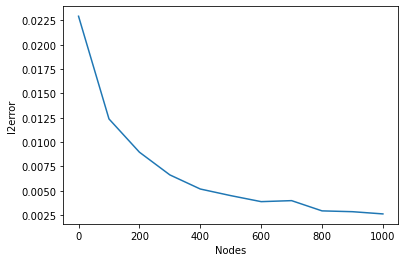

In [7]:
xAxis = list(range(0,1002, 100))
fig = plt.figure()
plt.xlabel('Nodes')
plt.ylabel('l2error')
plt.plot(xAxis,err[:])
#fig.savefig('../output/l2Error' + str(1002) + 'Nodes.png', dpi=fig.dpi)

-0.6919341628808938


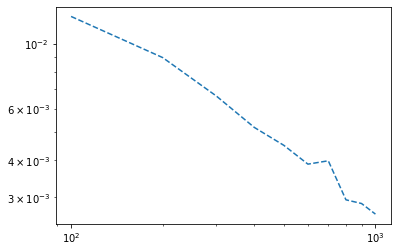

In [8]:
slope, intercept = np.polyfit(np.log(xAxis[1:]), np.log(err[1:]), 1)
print(slope)
plt.loglog(xAxis[1:], err[1:], '--')
#fig.savefig('../output/Logl2Error' + str(302) + 'Nodes.png', dpi=fig.dpi)